## Differential Equation Solver
### Jonathan Kelley

This program should generate a numeric solution to a differential equation using various numeric techniques.

Minimums – your program should:
- For a given differential equation, initial value, step size, and number of iterations, generate a numeric
solution to the differential equation using Euler’s method, Runge-Kutta (order 4) method, and at least
one of the following:
 - - A higher-order taylor method (e.g. quadratic euler)
 - - One or more Runge-Kutta order-2 methods
You might also:
- use Adams-Bashforth to generate a solution using the starter-predictor method
- use Adams-Bashforth and Adams-Moulton to generate a solution using the starter-predictor-corrector
method.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
initial_value = 0
step_size = 0.01
time_final = 50

##
num_iterations = int(time_final/step_size)

The Lorentz attractor is an exmaple of a simple differential equation with a really neat application and interesting visuals.

It is as:

$ \frac{dx}{dt} = \sigma ( y-x) $

$ \frac{dy}{dt} = x( \rho-z) - y $

$ \frac{dz}{dt} = xy - \beta z $

In [3]:
# Lorentz attractor:
# https://en.wikipedia.org/wiki/Lorenz_system

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

state0 = np.array([1.0, 1.0, 1.0])

def f(state):
    x, y, z = state
    return(np.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])) # derivatives

I wanted to have a simple way to plot the data for each method:

In [4]:
def plot3d_simple(data, title = "Plot Title", xlabel = "X Label", ylabel = "Y Label"):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(data[:,0], data[:,1], data[:,2])
    plt.title(title)
    plt.show()

In [5]:
def integrate_eulers(f, state0, num_iterations, h):
    positions = np.zeros((num_iterations,3))
    state = state0
    for i in range(len(positions)):
        state += (f(state) * h)
        positions[i] = state
        
    print(positions)
    return positions
        

In [6]:
states_eulers = integrate_eulers(f, state0, num_iterations, step_size)

[[  1.           1.26         0.98333333]
 [  1.026        1.51756667   0.96971111]
 [  1.07515667   1.77972176   0.95942238]
 ...
 [ -9.1621539  -13.1454497   21.87518155]
 [ -9.56048348 -13.5751605   22.4962497 ]
 [ -9.96195118 -13.96559403  23.19420069]]


<IPython.core.display.Javascript object>


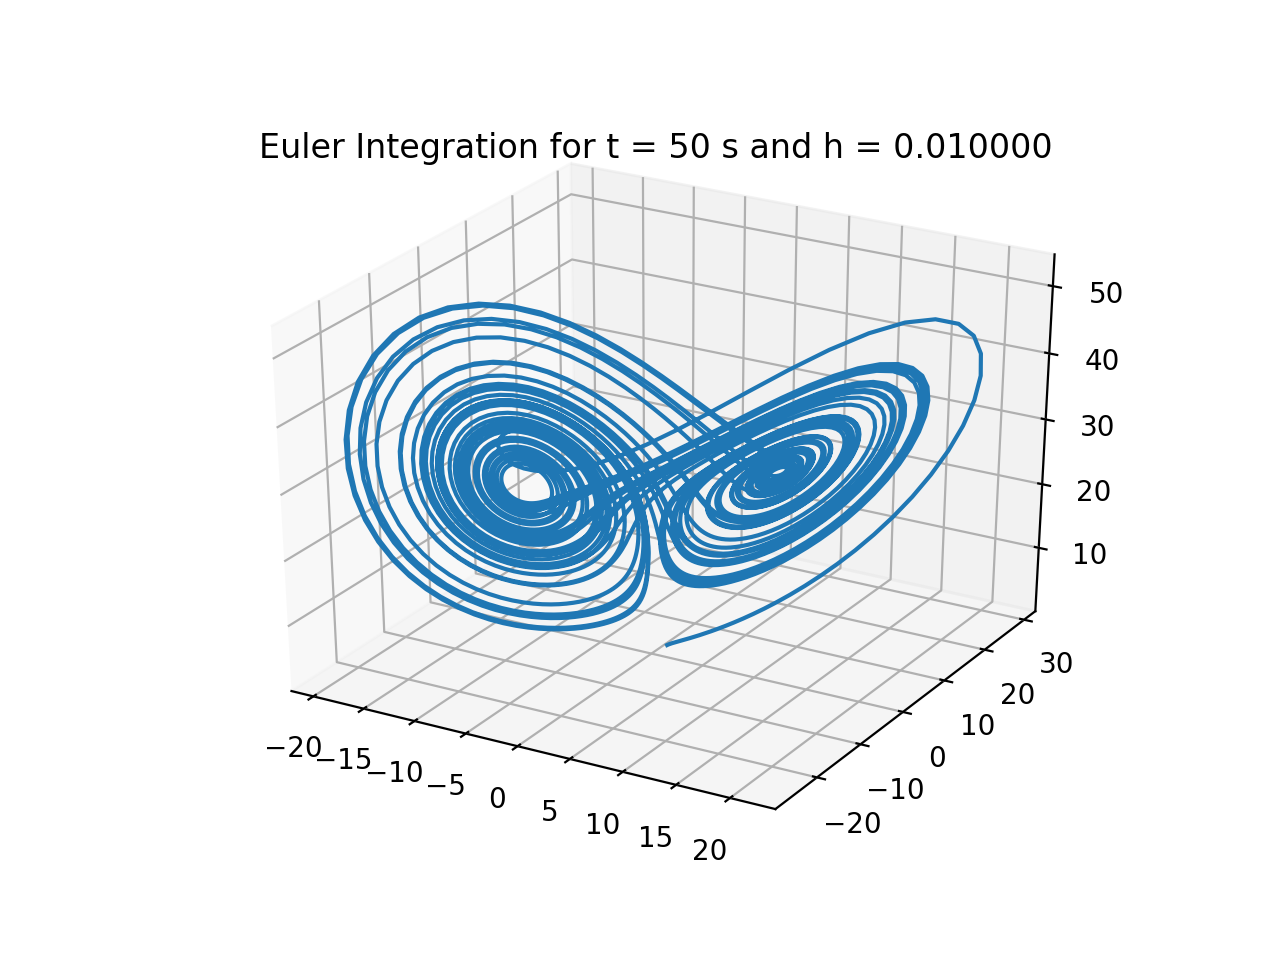

In [7]:
plot3d_simple(states_eulers, "Euler Integration for t = %s s and h = %f" % (time_final, step_size))

### It certainly looks like the Lorentz attractor!

Now that we've got all the basics down, let's develop the RK2 methods.

Eueler's 2nd Order:

$ k1 = \Delta t f(s) $

$ k2 = \Delta t f(s + \frac{k1}{2}) $

$ s = s + k2 $

In [8]:
def integrate_rk2(f, state0, num_iterations, h):
    positions = np.zeros((num_iterations,3))
    s = state0
    for i in range(len(positions)):
        k1 = h * f(s)
        k2 = h * f(s + k1/2.0)
        s = s + k2
        positions[i] = s

    return positions

<IPython.core.display.Javascript object>


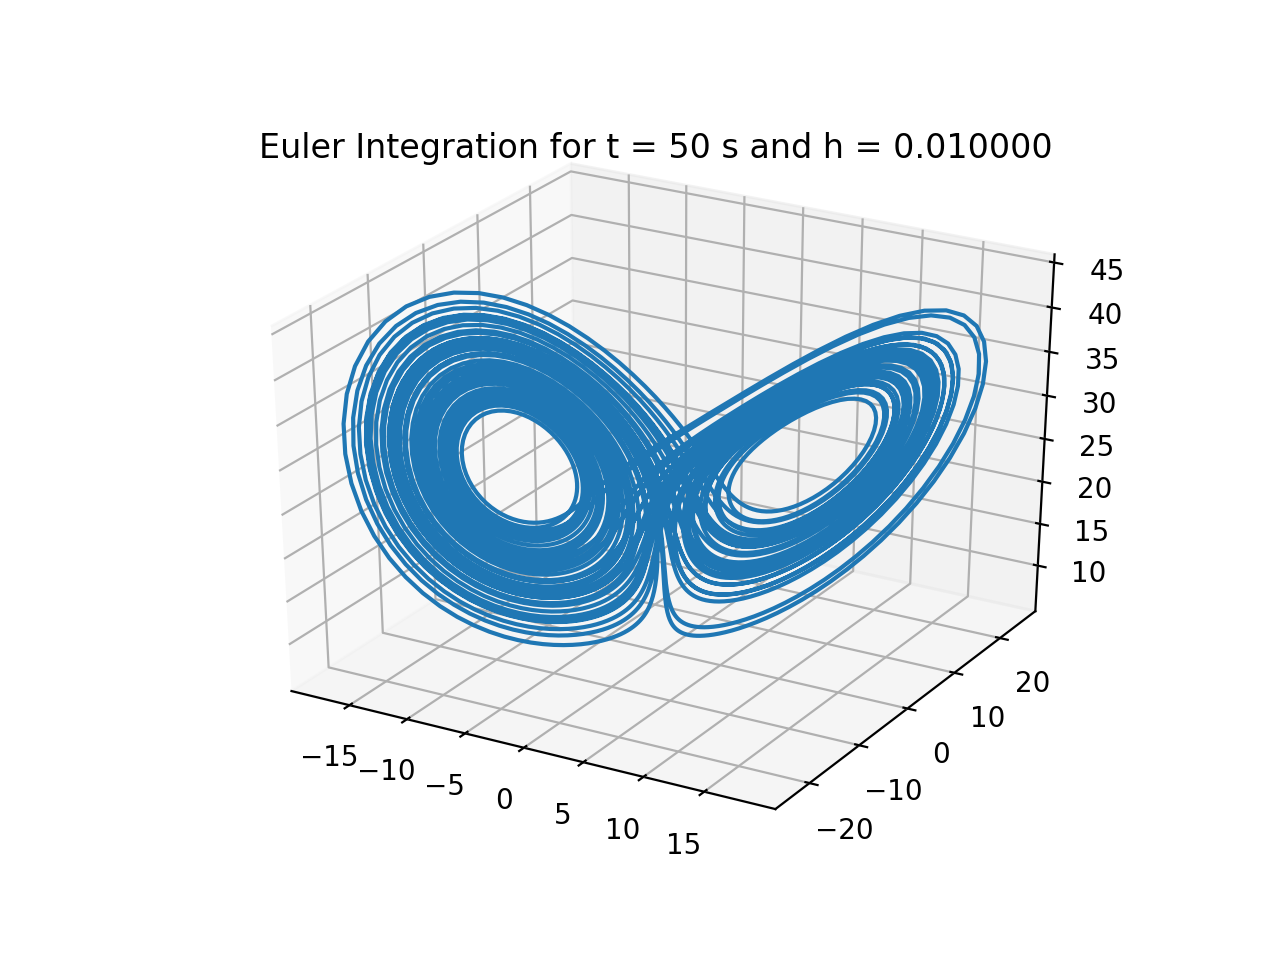

In [9]:
states_rk2 = integrate_rk2(f, state0, num_iterations, step_size)
plot3d_simple(states_rk2, "Euler Integration for t = %s s and h = %f" % (time_final, step_size))

### Looks good, let's step it up to fourth order.


In [10]:
def integrate_rk4(f, state0, num_iterations, h):
    positions = np.zeros((num_iterations,3))
    s = state0
    for i in range(len(positions)):
        k1 = h * f(s)
        k2 = h * f(s + k1/2.0)
        k3 = h * f(s + k2/2.0)
        k4 = h * f(s + k3)
        s = s + (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
        positions[i] = s

    return positions

<IPython.core.display.Javascript object>


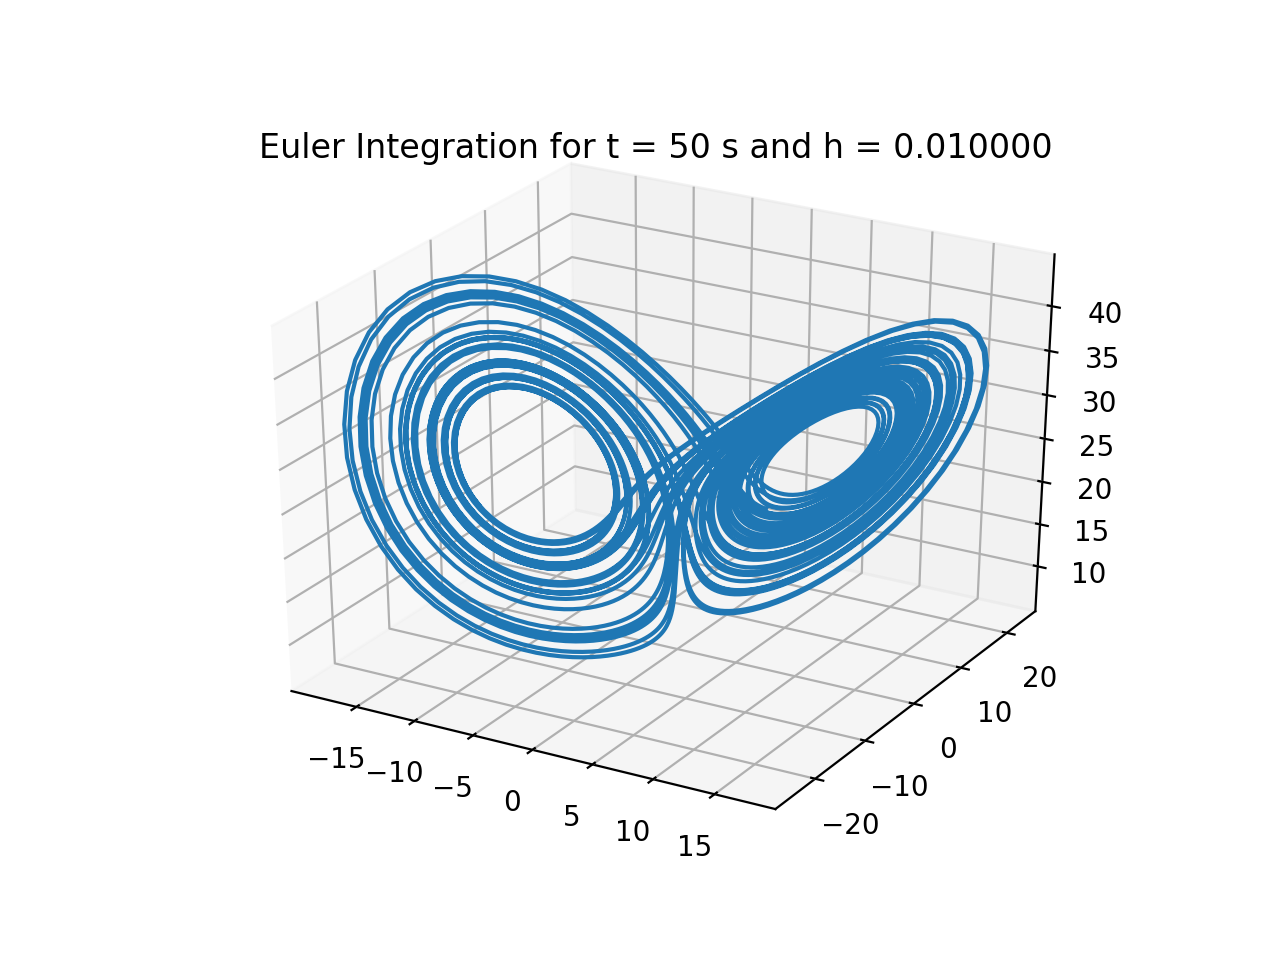

In [11]:
states_rk4 = integrate_rk4(f, state0, num_iterations, step_size)
plot3d_simple(states_rk4, "Euler Integration for t = %s s and h = %f" % (time_final, step_size))

## Beautiful!

Let's try the Adams-Bashford with Adams-Moulton

We know that the AB method 